# LINEAR SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import libsvm
from libsvm import svmutil
from libsvm.svmutil import *

%matplotlib inline

## 3.1 Linear Support Vector Machine on toy data

### 3.1.1 
Generate a training set of size $100$ with 2D features (X) drawn at random as follows:
* X_{neg} $\sim$ $\mathcal{N}$([-5, -5], 5*$I_2$) and correspond to negative labels (-1)
* X_{pos} $\sim$ $\mathcal{N}$([5, 5], 5*$I_2$) and correspond to positive labels (+1)
<br />
Accordingly, $X = [X_{neg}, X_{pos}]$ is a $100\times2$ array, Y is a $100\times1$ array of values $\in \{-1, 1\}$.
<p/>Draw a scatter plot of the full training dataset with the points colored according to their labels.

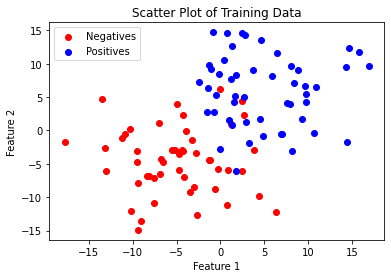

In [2]:
# Generate binary class dataset
np.random.seed(0)

n_samples = 100
center_1 = [-5, -5]
center_2 = [5, 5]
cov = [[25,0],[0,25]]
# cov = [[5,0],[0,5]]
# Generate Data:
Xneg = np.random.multivariate_normal(center_1, cov, int(n_samples/2) )
Xpos = np.random.multivariate_normal(center_2, cov, int(n_samples/2) )
X = np.concatenate((Xneg, Xpos))
Y = np.concatenate((np.array([-1]*50),np.array([1]*50)))

# Scatter plot:

fig = plt.figure()

colors = ('red', 'blue')
labels = ('Negatives', 'Positives')
plt.scatter(Xneg[:,0],Xneg[:,1], c= colors[0])
plt.scatter(Xpos[:,0],Xpos[:,1], c= colors[1])
plt.legend(['Negatives', 'Positives'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Scatter Plot of Training Data")
plt.show()

fig.savefig('Scatter plot of training data.png')

### 3.1.2 
Train a linear support vector machine on the data with $C=1$ and draw the decision boundary line that separates o and x. Mark the support vectors separately (ex.circle around the point). 

Note: You can use the libsvm.svmutil functions with the kernel_type set to 0, indiciating a linear kernel and svm_type set to 0 indicating C-SVC.
Also note that the support_vector coefficients returned by the LIBSVM model are the dual coefficients.

In [3]:
type(X)

numpy.ndarray

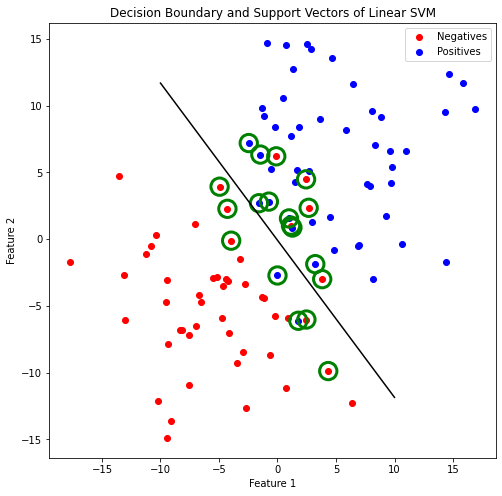

In [62]:
# Define the SVM problem
problem = svm_problem(Y, X)

# Define the hyperparameters
param = svm_parameter()
param.C = 1
param.kernel_type = 0
param.svm_type = 0
# param.gamma = 1

# Train the model
model = svm_train(problem, param)

# Compute the slope and intercept of the separating line/hyperplanee with the use of the support vectors
# and other information from the LIBSVM model.
sv_coef = model.get_sv_coef()
sv = model.get_SV()
sv_ind = model.get_sv_indices()
b1 = model.rho[0]
# compute the weights (lambda*)
w = np.zeros(np.shape(X)[1])
xi = np.zeros(np.shape(X[0]))
for index, coef in zip(sv_ind, sv_coef):
    alpha = coef[0]
    w = w + alpha * X[index -1 ] 
    
    # compute the lambda0* using a positive support vector
#     if Y[index -1] == 1:
#         xi = X[index -1]
    
# b = 1- w.dot(xi)

# cpmpute slope and intercept of the decision boundary line
slope = - w[0]/w[1]
#intcp = -b/w[1]
intcp = b1/w[1]

# Draw the scatter plot, the decision boundary line, and mark the support vectors.
fig = plt.figure(figsize=(8,8))

# scatter plot
colors = ('red', 'blue')
plt.scatter(Xneg[:,0],Xneg[:,1], c= colors[0])
plt.scatter(Xpos[:,0],Xpos[:,1], c= colors[1])
plt.legend(['Negatives', 'Positives'])

# mark the support vectors
x, y = [], []

for v in sv:
    x.append(v[1])
    y.append(v[2])

plt.scatter(x, y,s=300, facecolors='none', edgecolors='g', linewidths = 3)


# plot the dicision boundary line
xx = np.linspace(-10, 10)
yy = slope * xx + intcp
plt.plot(xx, yy, 'k-')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Decision Boundary and Support Vectors of Linear SVM")
plt.show()

fig.savefig('Decision line svm.png')





### 3.1.3 
Draw a line that separates the data for 8 different $C$ ($10^{-5}$~$10^7$).
Plot the number of support vectors vs. $C$ (plot x-axis on a log scale).
How does the number of support vectors change as $C$ increases and why does it change like that? 

Note: You might prefer to use the command-line style of svm_parameter initialization such as: svm_parameter('-s 0 -t 0') to indicate a linear kernel and C-SVC as the SVM type.


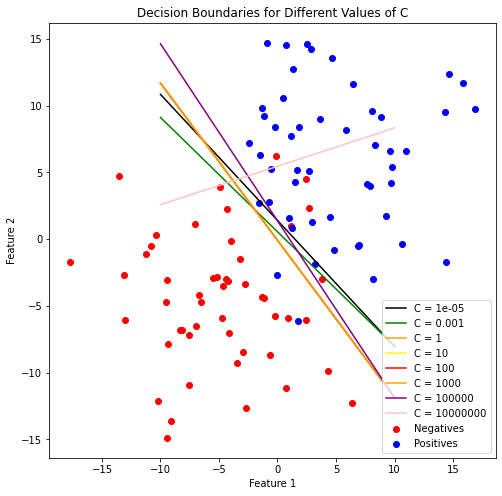

In [63]:

C_range = [10**-5, 10**-3, 1, 10, 100, 10**3, 10**5, 10**7]
num_sv = []
models = []
# Loop over a similar setup to that in the previous code block.
for C in C_range:
    problem = svm_problem(Y, X)
    param = svm_parameter('-s 0 -t 0 -c %f' % C)
    model = svm_train(problem, param)
    models.append(model)
    
slopes, interc = [], []
sv_num = []

for m in models:
    sv_coef = m.get_sv_coef()
    sv = m.get_SV()
    sv_ind = m.get_sv_indices()
    b = m.rho[0] # this is lambda_0
    
    # get number of sv
    sv_num.append(len(sv_ind))
    
    # compute lambda*
    w = np.zeros(np.shape(X)[1])
    xi = np.zeros(np.shape(X[0]))
    for index, coef in zip(sv_ind, sv_coef):
        alpha = coef[0]
        w = w + alpha * X[index -1 ] 
    
    
    
    # compute slopes and intercepts
    slopes.append(- w[0]/w[1]) 
    interc.append(b/w[1]) 
    
    
# Draw the scatter plot with multiple decision lines on top (one for each value of C)

fig = plt.figure(figsize=(8,8))
plt.scatter(Xneg[:,0],Xneg[:,1], c= colors[0], label = 'Negatives')
plt.scatter(Xpos[:,0],Xpos[:,1], c= colors[1], label = 'Positives')

xx = np.linspace(-10, 10)
colors = ['k','g','orange','yellow','red','orange','purple','pink']
for i in range(len(C_range)):
    k = slopes[i]
    b = interc[i]
    c = C_range[i]
    plt.plot(xx, k * xx + b, color = colors[i], label = 'C = {}'.format(c))

plt.legend(loc="lower right")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for Different Values of C')
plt.show()

fig.savefig('Decision Boundaries for Different Values of C.png')



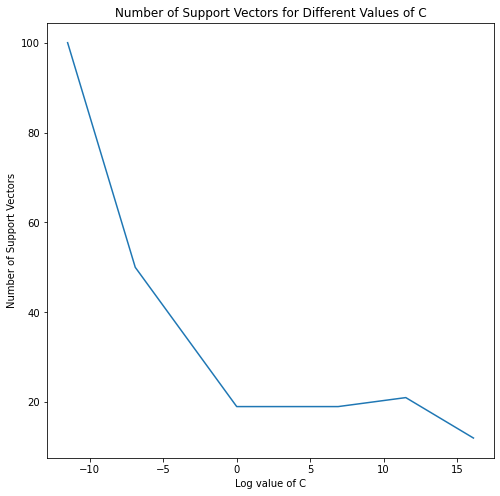

In [64]:
# Draw the num_sv vs. C plot.
fig = plt.figure(figsize=(8,8))

plt.plot(np.log(C_range), sv_num)

plt.xlabel('Log value of C')
plt.ylabel('Number of Support Vectors')
plt.title('Number of Support Vectors for Different Values of C')
plt.show()

fig.savefig('Number of Support Vectors for Different Values of C.png')


### 3.1.4 
Now try rescaling the data to the [0,1] range and repeat the steps of the previous question (3.1.3) and over the same range of $C$ values. Are the decision boundaries different from those in the previous question? What does this imply about (a) the geometric margin and (b) the relative effect of each feature on the predictions of the trained model ?

#### Solution below: 
SVM tries to maximize the distance between the separating plane and the support vectors. 
If one feature (i.e. one dimension in this space) has very large values, 
it will dominate the other features when calculating the distance. If you rescale all 
features (e.g. to [0, 1]), they all have the same influence on the distance metric.



In [65]:
import sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

# Single line below:
X_train_minmax = min_max_scaler.fit_transform(X)

In [66]:
# Scaled positive and negative data points
X_scale_neg = X_train_minmax[0:50]
X_scale_pos = X_train_minmax[50:]

In [74]:
print('Mean X1:', np.mean(X[:,0]))
print('Mean X2:', np.mean(X[:,1]))
print('Mean X1_Scaled:', np.mean(X_train_minmax[:,0]))
print('Mean X2_Scaled:', np.mean(X_train_minmax[:,1]))

Mean X1: -0.004788409022845635
Mean X2: 0.7138933404344573
Mean X1_Scaled: 0.5121054223476434
Mean X2_Scaled: 0.5272374972194459


In [67]:

C_range = [10**-5, 10**-3, 1, 10, 100, 10**3, 10**5, 10**7]
s_num_sv = []
s_models = []
s_slopes, s_interc = [], []

# Repeat the loop from 3.1.3

for C in C_range:
    problem = svm_problem(Y, X_train_minmax)
    param = svm_parameter('-s 0 -t 0 -c %f' % C)
    model = svm_train(problem, param)
    s_models.append(model)
    


for m in s_models:
    sv_coef = m.get_sv_coef()
    sv = m.get_SV()
    sv_ind = m.get_sv_indices()
    b = m.rho[0]
    # get number of sv
    s_num_sv.append(len(sv_ind))
    
    # compute lambda*
    w = np.zeros(np.shape(X_train_minmax)[1])
    xi = np.zeros(np.shape(X_train_minmax[0]))
    for index, coef in zip(sv_ind, sv_coef):
        alpha = coef[0]
        w = w + alpha * X_train_minmax[index -1 ] 
    

    
    # compute slopes and intercepts
    s_slopes.append(- w[0]/w[1]) 
    s_interc.append(b/w[1]) 



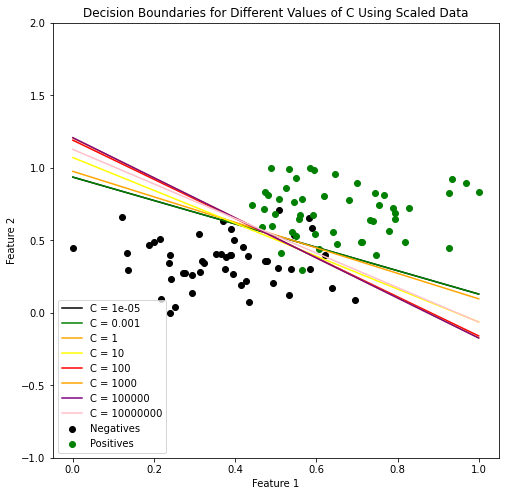

In [83]:
# plot sclaed data
fig = plt.figure(figsize=(8,8))

plt.scatter(X_scale_neg[:,0],X_scale_neg[:,1], c= colors[0], label = 'Negatives')
plt.scatter(X_scale_pos[:,0],X_scale_pos[:,1], c= colors[1], label = 'Positives')

colors = ['k','g','orange','yellow','red','orange','purple','pink']
xx = np.linspace(0, 1)

for i in range(len(C_range)):
    k1 = s_slopes[i]
    b1 = s_interc[i]
    c1 = C_range[i]
    plt.plot(xx, k1 * xx + b1, color = colors[i], label = 'C = {}'.format(c1))
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for Different Values of C Using Scaled Data')
plt.ylim([-1, 2])
plt.show()

fig.savefig('Decision Boundaries for Different Values of C for Scaled Data.png')   

In [89]:
for i in range(len(C_range)):
    print('%f %.2f %.2f' %(C_range[i],slopes[i],s_slopes[i]))

0.000010 -0.94 -0.81
0.001000 -0.86 -0.81
1.000000 -1.18 -0.88
10.000000 -1.18 -1.13
100.000000 -1.18 -1.35
1000.000000 -1.18 -1.38
100000.000000 -1.33 -1.38
10000000.000000 0.29 -1.19


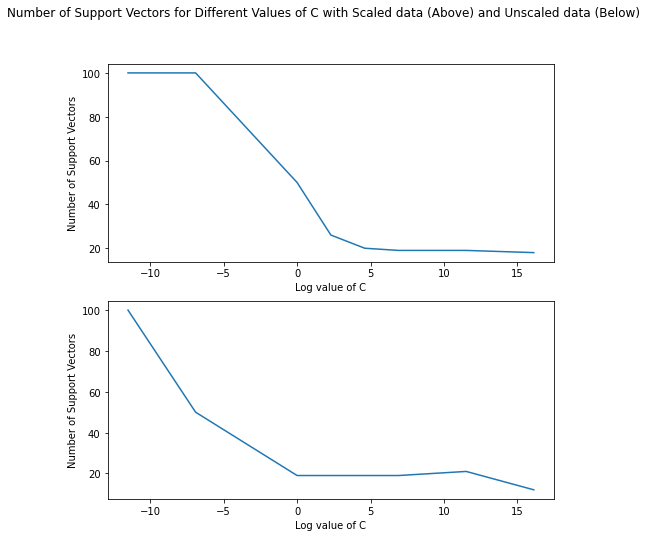

In [70]:
fig,axs = plt.subplots(2,figsize=(8,8))

axs[0].plot(np.log(C_range), s_num_sv)
axs[1].plot(np.log(C_range), sv_num)

for ax in axs.flat:
    ax.set(xlabel='Log value of C', ylabel = 'Number of Support Vectors')
    
fig.suptitle('Number of Support Vectors for Different Values of C with Scaled data (Above) and Unscaled data (Below)')
plt.show()

fig.savefig('Number of Support Vectors for Different Values of C1.png')

## 3.2 MNIST

Multiclass kernel SVM. In this problem, we’ll use support vector machines to classify the MNIST data
set of handwritten digits.

### 3.2.1 
Load in the MNIST data using from the provided mnist-original.mat file on sakai. 
First split the data into training and testing by simply taking the first 60k points as training and the rest as testing.
Then sample 500 data points for each of the 10 categories (for a total of 5000 training points) from the 60k training photos. These 5k points are now our training set.
Finally, sample 500 data points for each of the 10 categories from the 10k testing photos. These 5k points are now our testing set.

Note: For data loading, you might want to use scipy.io.loadmat.

In [90]:
import scipy
import scipy.io
from numpy import random
from random import sample
np.random.seed(0)


In [91]:
# load data
data = scipy.io.loadmat('mnist-original.mat')

In [92]:
# seperate test and training data
x_tr = data['data'][:,:60000]
x_te = data['data'][:,60000:]
y_tr = data['label'][:,:60000]
y_te = data['label'][:,60000:]
y_tr = y_tr[0]
y_te = y_te[0]

# sample 
x_train = []
y_train = []
x_test = []
y_test = []
for cat in np.unique(y_tr):
    
    # sample training set
    tr_ind_pop = list(np.where(y_tr ==cat)[0])
    tr_ind_s = sample(tr_ind_pop, 500)
    
    for i in tr_ind_s:
        x_train.append(x_tr[:,i])
    
    y_tr_s = np.zeros(500) + cat
    for y in y_tr_s:
        y_train.append(y)
    
    # sample test set
    te_ind_pop = list(np.where(y_te==cat)[0])
    te_ind_s = sample(te_ind_pop, 500)
    for i in te_ind_s:
        x_test.append(x_te[:,i])
    
    y_te_s = np.zeros(500) + cat
    for y in y_te_s:
        y_test.append(y)
    


In [93]:
np.unique(y_train, return_counts=True) #ensure each label has 500 examples.

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))

### 3.2.2
Draw 3 different digits using pyplot.imshow().

In [94]:
from matplotlib import pyplot

In [95]:
# extract 3 different digits
d1 = np.reshape(x_train[0],(28,28))
d2 = np.reshape(x_train[550], (28,28))
d3 = np.reshape(x_train[1200], (28,28))

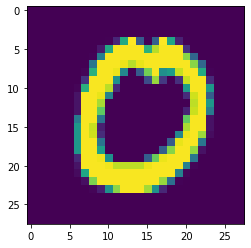

In [96]:
fig = pyplot.imshow(d1)
pyplot.savefig('digit_0.png')

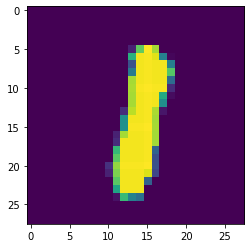

In [97]:
fig = pyplot.imshow(d2)
pyplot.savefig('digit_1.png')

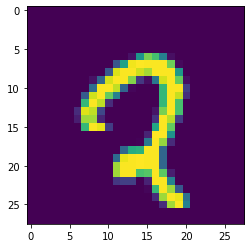

In [98]:
fig = pyplot.imshow(d3)
pyplot.savefig('digit_2.png')

### 3.2.3
For each value $C=10^{-12}~10^{12}$ train a support vector machine with a linear kernel and compute its accuracy on the test set subsampled previously.
Plot test accuracy and the number of support vectors (two separate plots) vs. $C$ for $C=10^{-12}$~$10^{12}$ (plot 7 points or more with the x-axis on a log scale).

In [99]:
Crange = [10**-12, 10**-10, 10**-8, 10**-5, 1, 10**5, 10**8, 10**10, 10**12]

In [100]:
# train svm on the training set
clf = []
for C in Crange:
    problem = svm_problem(y_train, x_train)
    param = svm_parameter('-s 0 -t 0')
    param.C = C
    model = svm_train(problem, param)
    clf.append(model)

In [101]:
# get number of sv and test accuracies
acc, num_sv = [], []
for m in clf:
    sv_i = m.get_sv_indices()
    num_sv.append(len(sv_i))
    
    _, p_acc, _ = svm_predict(y_test, x_test, m)
    acc.append(p_acc[0])

Accuracy = 69.96% (3498/5000) (classification)
Accuracy = 69.96% (3498/5000) (classification)
Accuracy = 87.82% (4391/5000) (classification)
Accuracy = 91.38% (4569/5000) (classification)
Accuracy = 91.08% (4554/5000) (classification)
Accuracy = 91.08% (4554/5000) (classification)
Accuracy = 91.08% (4554/5000) (classification)
Accuracy = 91.08% (4554/5000) (classification)
Accuracy = 91.08% (4554/5000) (classification)


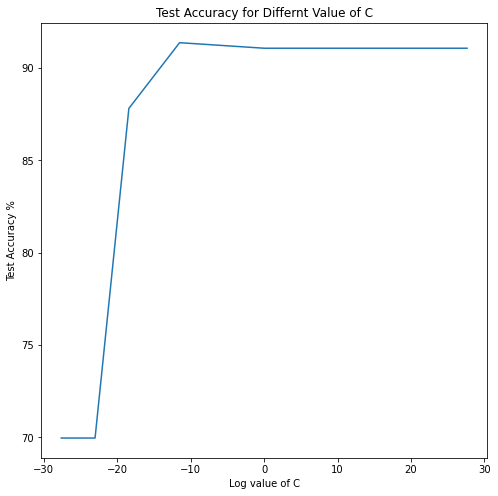

In [102]:
# plot test accuracy with respect to different C
fig = plt.figure(figsize = (8,8))

plt.plot(np.log(Crange), acc)

plt.title('Test Accuracy for Differnt Value of C')
plt.xlabel('Log value of C')
plt.ylabel('Test Accuracy %')
plt.show()

fig.savefig('Test Accuracy for Differnt Value of C.png')

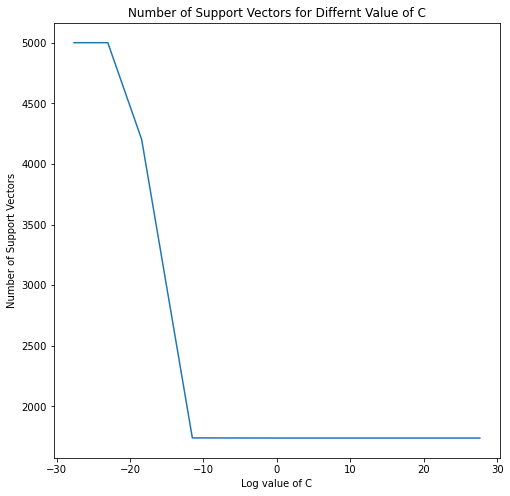

In [103]:
# plot number of support vector with respect to different C
fig = plt.figure(figsize = (8,8))

plt.plot(np.log(Crange), num_sv)

plt.title('Number of Support Vectors for Differnt Value of C')
plt.xlabel('Log value of C')
plt.ylabel('Number of Support Vectors')
plt.show()

fig.savefig('Number of Support Vectors for Differnt Value of C(digit).png')